In [28]:
INSTANCE_ID = '3e837294-c750-4a24-ada7-24886cf0d1fc'  # In case you put instance ID into configuration file you can leave this unchanged

In [29]:
import datetime
import numpy as np

import matplotlib.pyplot as plt

In [30]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [31]:
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox

In [32]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

In [33]:
betsiboka_coords_wgs84 = [46.16, -16.15, 46.51, -15.58]

In [34]:
betsiboka_bbox = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)

In [35]:
wms_true_color_request = WmsRequest(layer='TRUE-COLOR-S2-L1C',
                                    bbox=betsiboka_bbox,
                                    time='2017-12-15',
                                    width=512, height=856,
                                    instance_id=INSTANCE_ID)

In [36]:
wms_true_color_img = wms_true_color_request.get_data()

In [37]:
print('Returned data is of type = %s and length %d.' % (type(wms_true_color_img), len(wms_true_color_img)))

Returned data is of type = <class 'list'> and length 1.


In [41]:
print('Single element in the list is of type {} and has shape {}'.format(type(wms_true_color_img[-1]),
                                                                         wms_true_color_img[-1].shape))

Single element in the list is of type <class 'numpy.ndarray'> and has shape (856, 512, 3)


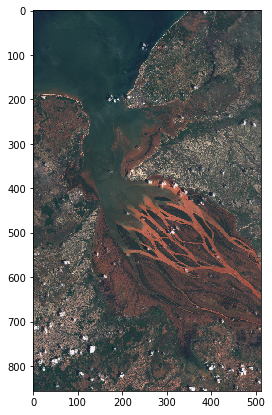

In [44]:
plot_image(wms_true_color_img[-1])

In [53]:
wms_true_color_request = WmsRequest(layer='TRUE-COLOR-S2-L1C',
                                    bbox=betsiboka_bbox,
                                    time='latest',
                                    width=512, height=856,
                                    instance_id=INSTANCE_ID)

In [51]:
wms_true_color_img = wms_true_color_request.get_data()

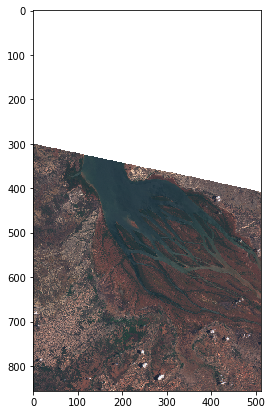

In [55]:
plot_image(wms_true_color_img[-1])

In [57]:
print('The latest Sentinel-2 image of this area was taken on {}.'.format(wms_true_color_request.get_dates()[-1]))

The latest Sentinel-2 image of this area was taken on 2019-11-05 07:14:11.


In [58]:
wms_true_color_request = WmsRequest(layer='TRUE-COLOR-S2-L1C',
                                    bbox=betsiboka_bbox,
                                    time=('2017-12-01', '2017-12-31'),
                                    width=512, height=856,
                                    instance_id=INSTANCE_ID)